***Nisa Aprilia M.***

***FTDS #004***

**Phase 2, Milestone 1: Artificial Neural Network**

# I. INTRODUCTION 

**1) PROBLEM**

***A telecommunication company (Telco) wants to analyze all relevant customer data and develop focused customer retention programs to prevent customers from retaining.***

**2) DATASET**

**Title:** Telco Customer Churn

**Source:** https://www.kaggle.com/blastchar/telco-customer-churn

**Classification Characteristics:** Binary Classification 

**Dataset Brief Information:** The data set includes information about:

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents

**3) OBJECTIVES**

**a. Analyzing customer's signed products, account and demographic information effects on customer's churn** 

**b. Build an ANN classifier model to predict customer's churn**

# II. IMPORT LIBRARY 

In [143]:
import tensorflow as tf
from tensorflow import keras
from keras_tuner import RandomSearch
import sklearn
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import metrics

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# III. LOAD DATASET & QUICK EXPLORATION

**Import dataset from csv file:**

In [144]:
df = pd.read_csv(r"C:\Users\nisam\Downloads\telco_data.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Check dataset shape:**

In [145]:
df.shape

(7043, 21)

**Check dataset information**

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Get statistical overview of numeric features in dataset:**

In [147]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Check distribution of data classification:**

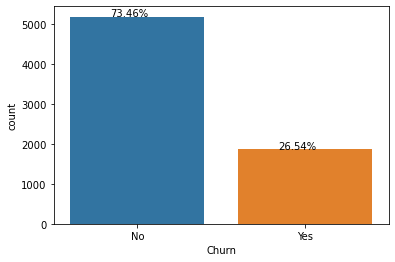

In [148]:
ax = sns.countplot(x='Churn', data=df)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format((p.get_height() * 100) / len(df)), (p.get_x() + 0.24, p.get_height() + 2))
plt.show()

***We can conclude that class distribution is imbalance.***

**Remove column: Customer ID because that is not useful for our deep learning**

In [149]:
df.drop('customerID', axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# IV. DATA CLEANING 

In [150]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

***There is no null values in the dataset.***

**Check Outliers in Numeric Features:**

In [151]:
# convert column 'Total Charges' to numerical  
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors = 'coerce')

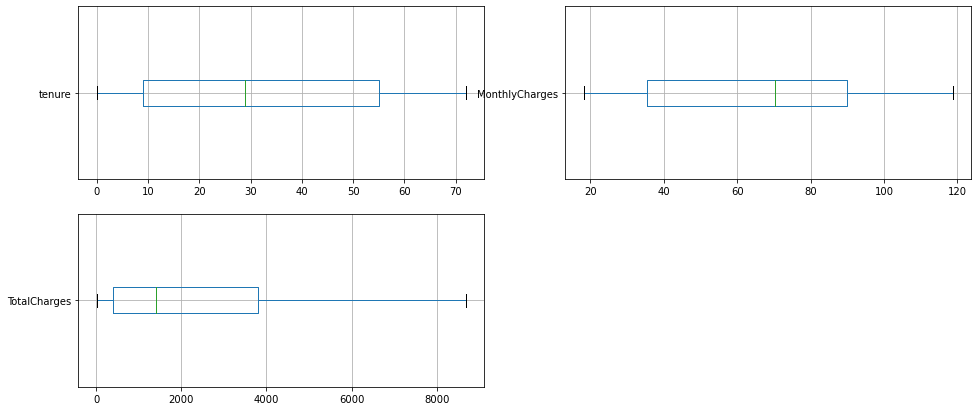

In [152]:
fig, ax = plt.subplots(figsize=(16,7))

plt.subplot(2,2,1)
df.boxplot('tenure',vert=False)
plt.subplot(2,2,2)
df.boxplot('MonthlyCharges',vert=False)
plt.subplot(2,2,3)
df.boxplot('TotalCharges',vert=False)
plt.show()

***There seems to be no outliers detected on numerical features.***

# V. EXPLORATORY DATA ANALYSIS

In this EDA we will discover the following analysis:

1) Customer's demographic information correlation to customer's churn 

2) Customer's signed telco products information correlation to customer's churn 

3) Customer's account information correlation to customer's churn 

In [153]:
# get a new dataset with each class
df_no = df.loc[df['Churn'] == 'No']
df_yes = df.loc[df['Churn'] == 'Yes']

**Customer's Demographic**

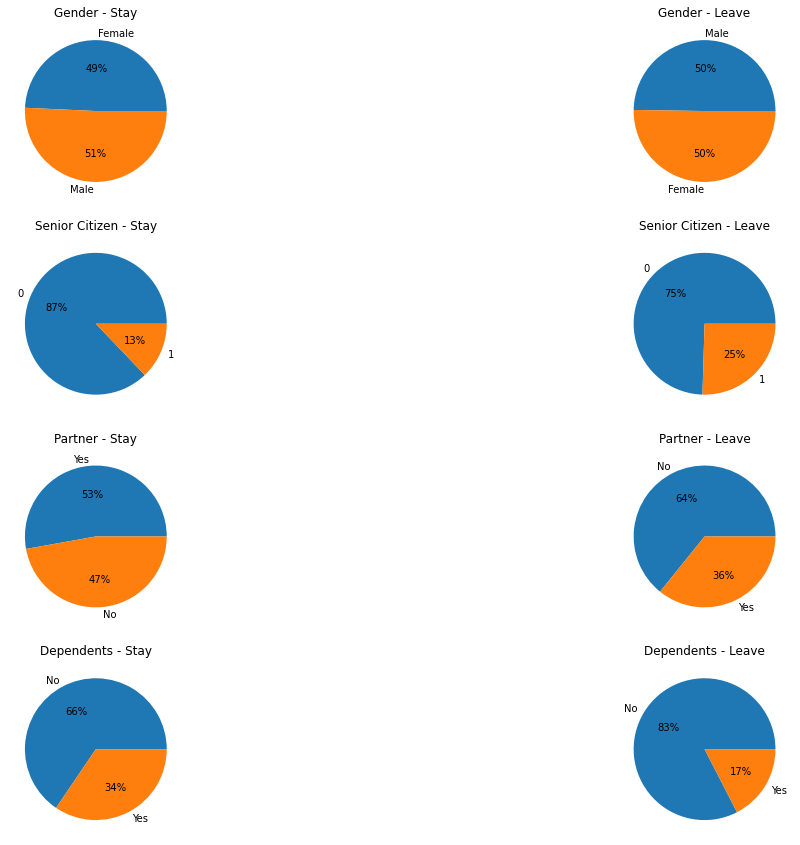

In [154]:
fig, ax = plt.subplots(4, 2, figsize=(20,15))

data1, label1 = df_no.groupby('gender', sort=False)['Churn'].count(), df_no['gender'].unique()
data2, label2 = df_no.groupby('SeniorCitizen', sort=False)['Churn'].count(), df_no['SeniorCitizen'].unique()
data3, label3 = df_no.groupby('Partner', sort=False)['Churn'].count(), df_no['Partner'].unique()
data4, label4 = df_no.groupby('Dependents', sort=False)['Churn'].count(), df_no['Dependents'].unique()
data5, label5 = df_yes.groupby('gender', sort=False)['Churn'].count(), df_yes['gender'].unique()
data6, label6 = df_yes.groupby('SeniorCitizen', sort=False)['Churn'].count(), df_yes['SeniorCitizen'].unique()
data7, label7 = df_yes.groupby('Partner', sort=False)['Churn'].count(), df_yes['Partner'].unique()
data8, label8 = df_yes.groupby('Dependents', sort=False)['Churn'].count(), df_yes['Dependents'].unique()

plt.subplot(4,2,1)
plt.pie(data1, labels = label1, autopct='%.0f%%')
plt.title('Gender - Stay', fontsize= 12)
plt.subplot(4,2,2)
plt.pie(data5, labels = label5, autopct='%.0f%%')
plt.title('Gender - Leave', fontsize= 12)
plt.subplot(4,2,3)
plt.pie(data2, labels = label2, autopct='%.0f%%')
plt.title('Senior Citizen - Stay', fontsize= 12)
plt.subplot(4,2,4)
plt.pie(data6, labels = label6, autopct='%.0f%%')
plt.title('Senior Citizen - Leave', fontsize= 12)
plt.subplot(4,2,5)
plt.pie(data3, labels = label3, autopct='%.0f%%')
plt.title('Partner - Stay', fontsize= 12)
plt.subplot(4,2,6)
plt.pie(data7, labels = label7, autopct='%.0f%%')
plt.title('Partner - Leave', fontsize= 12)
plt.subplot(4,2,7)
plt.pie(data4, labels = label4, autopct='%.0f%%')
plt.title('Dependents - Stay', fontsize= 12)
plt.subplot(4,2,8)
plt.pie(data8, labels = label8, autopct='%.0f%%')
plt.title('Dependents - Leave', fontsize= 12)

plt.show()

***-There is a balanced distribution of female and male in both classes***

***-Both classes are dominated with non-senior citizen, although there are more senior customers to churn than there are who do not churn.***

***-Majority of loyal customers are people with partners, while people with no partners are most likely to churn***

***-Both classes are dominated with customers who do not have dependents, although there are more loyal customers with dependents than churned customers with dependents.***

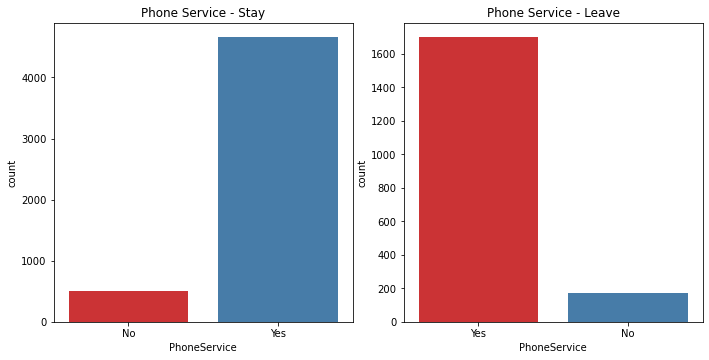

In [155]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.tight_layout(pad=2)

plt.subplot(1,2,1)
sns.countplot(x="PhoneService", data=df_no, palette="Set1")
plt.title('Phone Service - Stay', fontsize= 12)
plt.subplot(1,2,2)
sns.countplot(x="PhoneService", data=df_yes, palette="Set1")
plt.title('Phone Service - Leave', fontsize= 12)
plt.show()

***There are more customers who signed up for phone service in loyal class (around 4500) than there are who churn (around 1700). Although they dominated both class.***

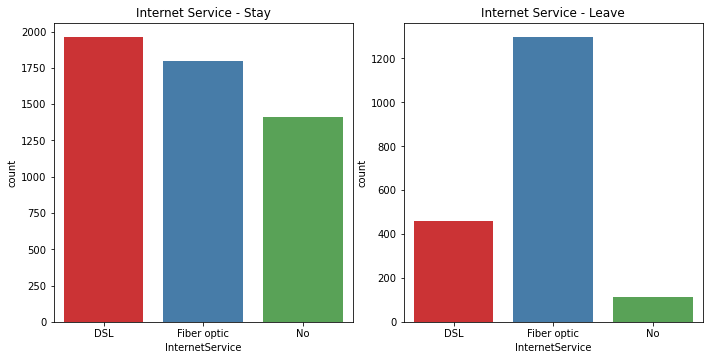

In [156]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.tight_layout(pad=2)

plt.subplot(1,2,1)
sns.countplot(x="InternetService", data=df_no, palette="Set1")
plt.title('Internet Service - Stay', fontsize= 12)
plt.subplot(1,2,2)
sns.countplot(x="InternetService", data=df_yes, palette="Set1")
plt.title('Internet Service - Leave', fontsize= 12)
plt.show()

***Customers signed up for DSL internet service seems to be less likely to churn***

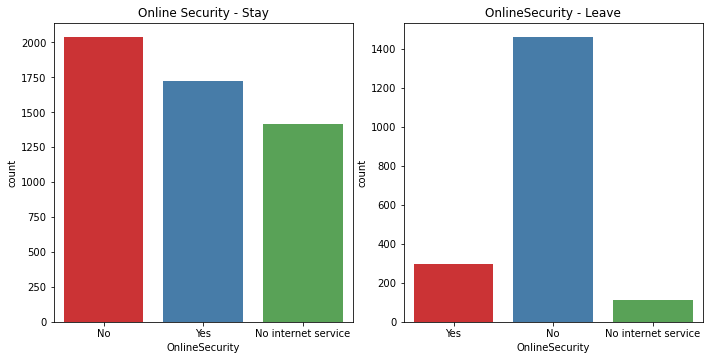

In [157]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(10,5))
fig.tight_layout(pad=2)

plt.subplot(1,2,1)
sns.countplot(x="OnlineSecurity", data=df_no, palette="Set1")
plt.title('Online Security - Stay', fontsize= 12)
plt.subplot(1,2,2)
sns.countplot(x="OnlineSecurity", data=df_yes, palette="Set1")
plt.title('OnlineSecurity - Leave', fontsize= 12)
plt.show()

***Customers signed up for online security service are less likely to churn***

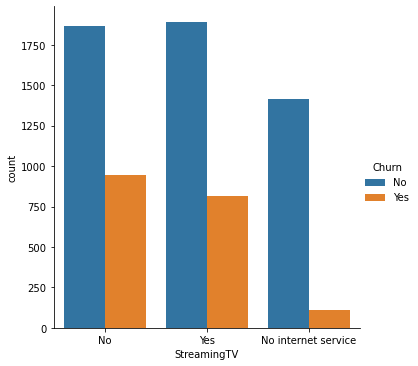

In [158]:
sns.catplot(x="StreamingTV", hue="Churn", kind="count", data=df)
plt.show()

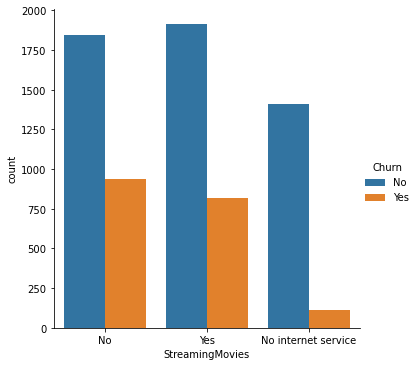

In [159]:
sns.catplot(x="StreamingMovies", hue="Churn", kind="count", data=df)

***Features streaming TV & Movie seems to be features that are similar to each other by seeing the graph & distribution of it. There are more churned customers who did not sign up for both products, although it is not very significant.***

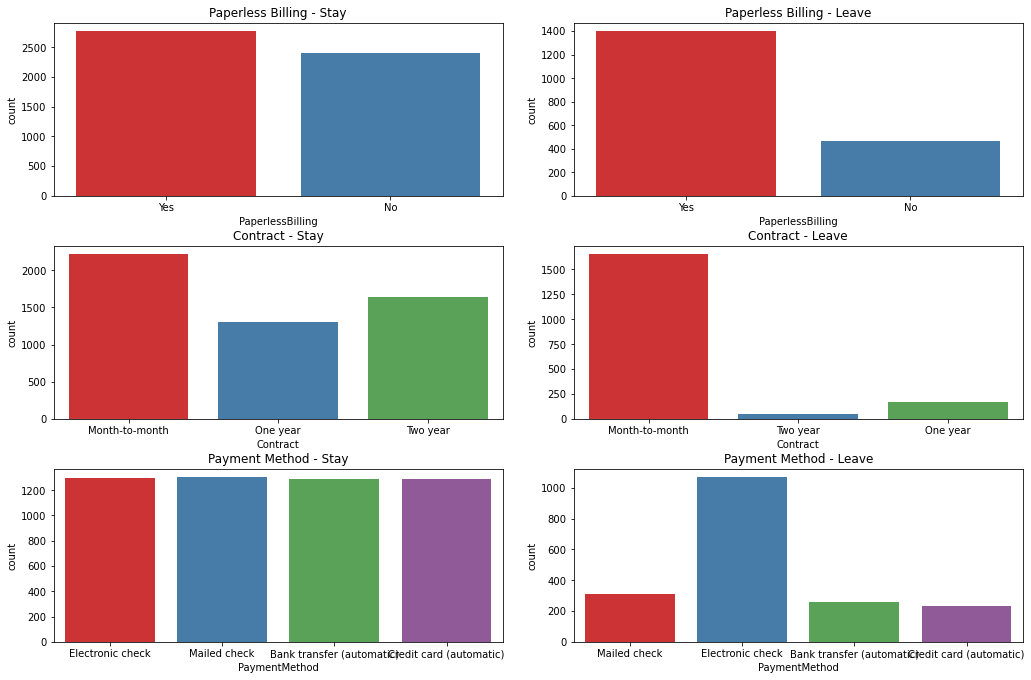

In [160]:
fig, ax = plt.subplots(3, 2, sharex=True, figsize=(15,10))
fig.tight_layout(pad=4)

plt.subplot(3,2,1)
sns.countplot(x="PaperlessBilling", data=df_no, palette="Set1")
plt.title('Paperless Billing - Stay', fontsize= 12)
plt.subplot(3,2,2)
sns.countplot(x="PaperlessBilling", data=df_yes, palette="Set1")
plt.title('Paperless Billing - Leave', fontsize= 12)
plt.subplot(3,2,3)
sns.countplot(x="Contract", data=df_no, palette="Set1")
plt.title('Contract - Stay', fontsize= 12)
plt.subplot(3,2,4)
sns.countplot(x="Contract", data=df_yes, palette="Set1")
plt.title('Contract - Leave', fontsize= 12)
plt.subplot(3,2,5)
sns.countplot(x="PaymentMethod", data=df_no, palette="Set1")
plt.title('Payment Method - Stay', fontsize= 12)
plt.subplot(3,2,6)
sns.countplot(x="PaymentMethod", data=df_yes, palette="Set1")
plt.title('Payment Method - Leave', fontsize= 12)

plt.show()

***From these 3 features, we can conclude that customers with longer term contract (one/two year contract) are less likely to churn, and customers whose payment method were electronic check, are more likely to churn than other payment menthod.***

<AxesSubplot:xlabel='tenure', ylabel='Density'>

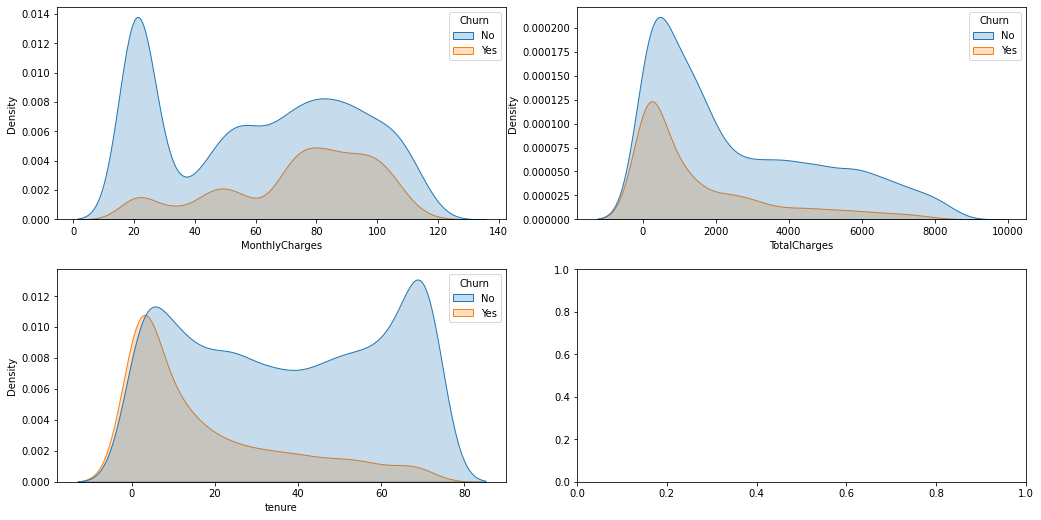

In [161]:
fig, ax = plt.subplots(2, 2, sharex=True, figsize=(15, 8))
fig.tight_layout(pad=4)

plt.subplot(2,2,1)
sns.kdeplot(data=df, x="MonthlyCharges", hue="Churn", fill=True)
plt.subplot(2,2,2)
sns.kdeplot(data=df, x="TotalCharges", hue="Churn", fill=True)
plt.subplot(2,2,3)
sns.kdeplot(data=df, x="tenure", hue="Churn", fill=True)

***The distribution of Total Charges seems to be same for both classes, while customers with a lower monthly charge seems to stay than ones with higher monthly charge. Tenure of both classes totally has a different distribution, customers with longer tenure tends to stay while those with shorter tenure are more likely to leave/churn.***

**EDA CONCLUSION:**

**1) Demographical features: senior citizen, partner, and dependents,**

**2) Signed-up pruducts features: internet service, online security, streaming movies, and**

**3) Account information: tenure, contract and monthly charge** 

**are considered to be useful features for our classification model deep learning.**

# VI. DATA PREPROCESSING

In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


**Set new dataset with selected features**

In [163]:
df4model = df.copy()
df4model = df[['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService', 'OnlineSecurity',
        'StreamingMovies', 'Contract', 'MonthlyCharges', 'Churn']]

# label encoding for class manually 
df4model.Churn.replace(('No', 'Yes'), (0, 1), inplace=True)
df4model.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,StreamingMovies,Contract,MonthlyCharges,Churn
0,0,Yes,No,1,DSL,No,No,Month-to-month,29.85,0
1,0,No,No,34,DSL,Yes,No,One year,56.95,0
2,0,No,No,2,DSL,Yes,No,Month-to-month,53.85,1
3,0,No,No,45,DSL,Yes,No,One year,42.30,0
4,0,No,No,2,Fiber optic,No,No,Month-to-month,70.70,1


**Label Encoding** 

In [164]:
le = LabelEncoder()

# label encoding for some features using label encoder 
df4model['Partner'] = le.fit_transform(df4model.Partner.values)
df4model['Dependents'] = le.fit_transform(df4model.Dependents.values)
df4model['InternetService'] = le.fit_transform(df4model.InternetService.values)
df4model['OnlineSecurity'] = le.fit_transform(df4model.OnlineSecurity.values)
df4model['StreamingMovies'] = le.fit_transform(df4model.StreamingMovies.values)
df4model['Contract'] = le.fit_transform(df4model.Contract.values)

In [165]:
df4model.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,StreamingMovies,Contract,MonthlyCharges,Churn
0,0,1,0,1,0,0,0,0,29.85,0
1,0,0,0,34,0,2,0,1,56.95,0
2,0,0,0,2,0,2,0,0,53.85,1
3,0,0,0,45,0,2,0,1,42.30,0
4,0,0,0,2,1,0,0,0,70.70,1


**CORRELATION BETWEEN SELECTED FEATURES BASED ON EDA CONCLUSION ON A HEATMAP:**

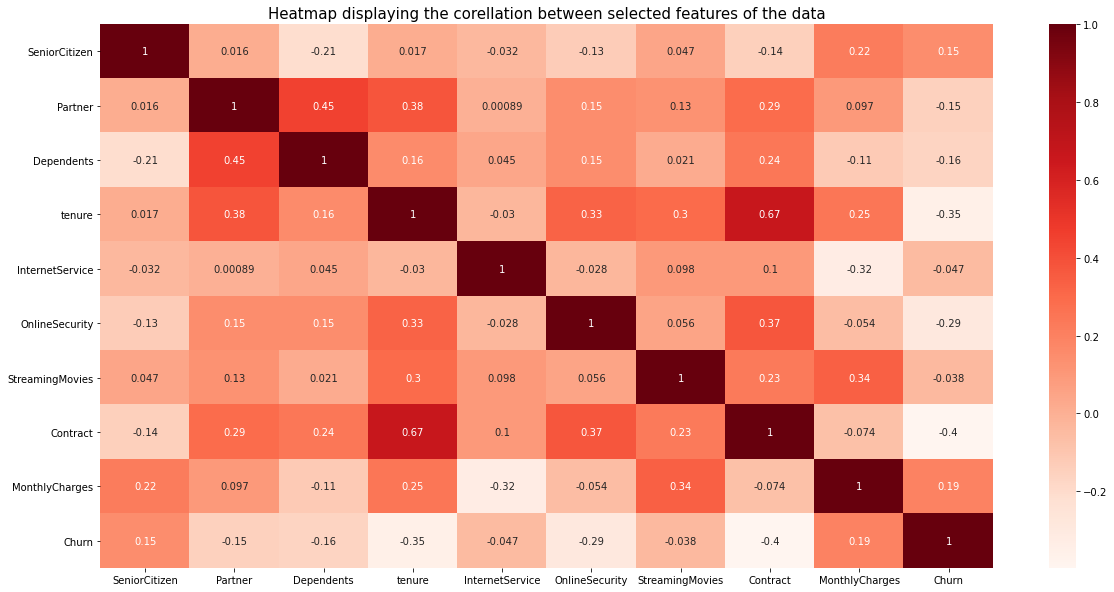

In [166]:
plt.figure(figsize=(20,10))
sns.heatmap(df4model.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the corellation between selected features of the data', fontsize=15)
plt.show()

**Set features and class**

In [167]:
X = df4model.drop(['Churn'], axis=1)
y = df4model[['Churn']]
#y = np.asarray(df4model['Churn']).astype('float32').reshape((-1,1))
print('X Shape:', X.shape)
print('y Shape:', y.shape)

X Shape: (7043, 9)
y Shape: (7043, 1)


**Split data into separate training, validation, and test set**

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print('X_train shape:', X_train.shape)
print('X_val Shape:', X_val.shape)
print('X_test Shape:', X_test.shape)

X_train shape: (5070, 9)
X_val Shape: (564, 9)
X_test Shape: (1409, 9)


**Data Scaling**

In [169]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# VII. DEEP LEARNING 

**In this section I will make an ANN sequential and ANN functional model to make predictions.**

# 1) ANN Sequential API

***ANN Sequential API with 3 hidden layers using relu activation, each layer set with 100-50-50 neurons, and trained to 50 epoch with early stopping, and using adam as optimizer.***

In [170]:
np.random.seed(42)
tf.random.set_seed(42)

**MODEL DEFINITION**

In [171]:
model1 = keras.models.Sequential([
    keras.layers.Dense(100, input_shape=(9,), activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [172]:
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 100)               1000      
                                                                 
 dense_47 (Dense)            (None, 50)                5050      
                                                                 
 dense_48 (Dense)            (None, 50)                2550      
                                                                 
 dense_49 (Dense)            (None, 1)                 51        
                                                                 
Total params: 8,651
Trainable params: 8,651
Non-trainable params: 0
_________________________________________________________________


**MODEL COMPILE**

In [173]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**MODEL TRAINING**

In [174]:
# setting early stopping for best score 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [175]:
history1 = model1.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/50
159/159 [==============================] - 1s 2ms/step - loss: 0.4663 - accuracy: 0.7661 - val_loss: 0.4056 - val_accuracy: 0.8138
Epoch 2/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7840 - val_loss: 0.4124 - val_accuracy: 0.8085
Epoch 3/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4300 - accuracy: 0.7929 - val_loss: 0.4007 - val_accuracy: 0.8121
Epoch 4/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4268 - accuracy: 0.7937 - val_loss: 0.4035 - val_accuracy: 0.8156
Epoch 5/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4229 - accuracy: 0.7988 - val_loss: 0.4093 - val_accuracy: 0.8014
Epoch 6/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4228 - accuracy: 0.7980 - val_loss: 0.4013 - val_accuracy: 0.8103
Epoch 7/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4209 - accuracy: 0.7957 - val_loss: 0.4049 - val_accuracy: 0.7979
Epoch 

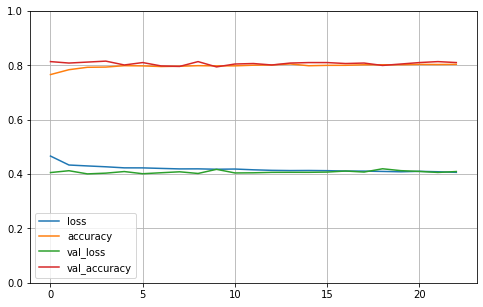

In [176]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**MODEL EVALUATION: Accuracy**

In [177]:
model1_score = model1.evaluate(X_test, y_test)

45/45 [==============================] - 0s 791us/step - loss: 0.4178 - accuracy: 0.7956


**MODEL IMPROVEMENT**

***with 2 hidden layers using relu activation, each layer set with 50 neurons, and trained to 30 epoch WIHTOUT early stopping, and using SGD as optimizer.***

In [178]:
np.random.seed(42)
tf.random.set_seed(42)

**MODEL DEFINITION**

In [179]:
model2 = keras.models.Sequential([
    keras.layers.Dense(50, input_shape=(9,), activation="relu"),
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [180]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 50)                500       
                                                                 
 dense_51 (Dense)            (None, 50)                2550      
                                                                 
 dense_52 (Dense)            (None, 1)                 51        
                                                                 
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


**MODEL COMPILE**

In [181]:
model2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

**MODEL TRAINING**

In [182]:
history2 = model2.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))
y_pred = model2.predict(X_test)

Epoch 1/30
159/159 [==============================] - 1s 3ms/step - loss: 0.5501 - accuracy: 0.7327 - val_loss: 0.4903 - val_accuracy: 0.7376
Epoch 2/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7469 - val_loss: 0.4532 - val_accuracy: 0.7748
Epoch 3/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4631 - accuracy: 0.7663 - val_loss: 0.4353 - val_accuracy: 0.8085
Epoch 4/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4522 - accuracy: 0.7750 - val_loss: 0.4252 - val_accuracy: 0.8085
Epoch 5/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.7755 - val_loss: 0.4187 - val_accuracy: 0.8121
Epoch 6/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4420 - accuracy: 0.7793 - val_loss: 0.4141 - val_accuracy: 0.8174
Epoch 7/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7821 - val_loss: 0.4107 - val_accuracy: 0.8209
Epoch 

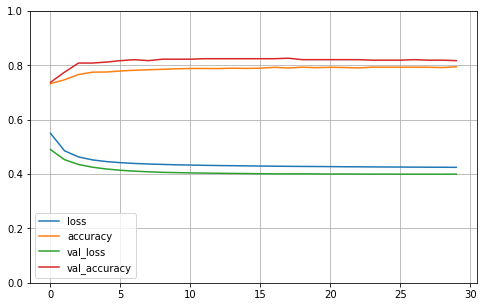

In [183]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**MODEL EVALUATION: Accuracy**

In [184]:
model2_score = model2.evaluate(X_test, y_test)

45/45 [==============================] - 0s 789us/step - loss: 0.4076 - accuracy: 0.8077


# 2) ANN Functional API

***with 3 hidden layers, each layer set with 50 neurons, using relu activation. Trained to 30 epochs WITHOUT early stopping, and using SGD as optimizer.***

In [185]:
np.random.seed(42)
tf.random.set_seed(42)

**MODEL DEFINITION**

In [186]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(50, activation="relu")(input_)
hidden2 = keras.layers.Dense(50, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu")(hidden2)
concat = keras.layers.concatenate([input_, hidden3])
output = keras.layers.Dense(1)(concat)
model_func = keras.models.Model(inputs=[input_], outputs=[output])

In [187]:
model_func.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense_53 (Dense)               (None, 50)           500         ['input_7[0][0]']                
                                                                                                  
 dense_54 (Dense)               (None, 50)           2550        ['dense_53[0][0]']               
                                                                                                  
 dense_55 (Dense)               (None, 50)           2550        ['dense_54[0][0]']               
                                                                                            

**MODEL COMPILE**

In [188]:
model_func.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

**MODEL TRAINING**

In [189]:
history_func = model_func.fit(X_train, y_train, epochs=30,
                    validation_data=(X_val, y_val))

Epoch 1/30
159/159 [==============================] - 1s 2ms/step - loss: 0.8989 - accuracy: 0.6957 - val_loss: 0.5244 - val_accuracy: 0.7270
Epoch 2/30
159/159 [==============================] - 0s 1ms/step - loss: 0.5401 - accuracy: 0.7483 - val_loss: 0.4920 - val_accuracy: 0.7730
Epoch 3/30
159/159 [==============================] - 0s 1ms/step - loss: 0.5112 - accuracy: 0.7639 - val_loss: 0.4949 - val_accuracy: 0.7660
Epoch 4/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4932 - accuracy: 0.7750 - val_loss: 0.4713 - val_accuracy: 0.8050
Epoch 5/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.7783 - val_loss: 0.4668 - val_accuracy: 0.8032
Epoch 6/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4857 - accuracy: 0.7789 - val_loss: 0.4788 - val_accuracy: 0.7996
Epoch 7/30
159/159 [==============================] - 0s 1ms/step - loss: 0.4871 - accuracy: 0.7793 - val_loss: 0.4641 - val_accuracy: 0.8085
Epoch 

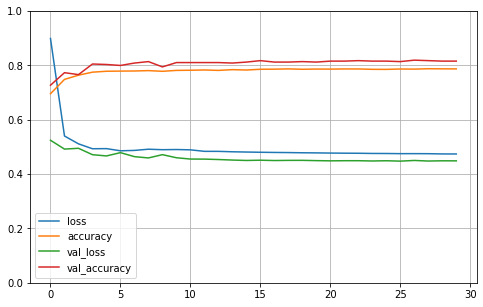

In [190]:
pd.DataFrame(history_func.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**MODEL EVALUATION: Accuracy**

In [191]:
modelfunc_score = model_func.evaluate(X_test, y_test)

45/45 [==============================] - 0s 910us/step - loss: 0.4702 - accuracy: 0.8048


**MODEL IMPROVEMENT**

***with 5 hidden layers, each layer set with 50 neurons, using relu activation. Trained to 50 epochs WITH early stopping, and using adam as optimizer.***

In [192]:
np.random.seed(42)
tf.random.set_seed(42)

**MODEL DEFINITION**

In [193]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(100, activation="relu")(input_)
hidden2 = keras.layers.Dense(100, activation="relu")(hidden1)
hidden3 = keras.layers.Dense(50, activation="relu")(hidden2)
hidden4 = keras.layers.Dense(50, activation="relu")(hidden3)
hidden5 = keras.layers.Dense(50, activation="relu")(hidden4)
concat = keras.layers.concatenate([input_, hidden5])
output = keras.layers.Dense(1, activation="sigmoid")(concat)
model_func2 = keras.models.Model(inputs=[input_], outputs=[output])

In [194]:
model_func2.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 9)]          0           []                               
                                                                                                  
 dense_57 (Dense)               (None, 100)          1000        ['input_8[0][0]']                
                                                                                                  
 dense_58 (Dense)               (None, 100)          10100       ['dense_57[0][0]']               
                                                                                                  
 dense_59 (Dense)               (None, 50)           5050        ['dense_58[0][0]']               
                                                                                            

**MODEL COMPILE**

In [195]:
model_func2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

**MODEL TRAINING**

In [196]:
# setting early stopping for best score 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [197]:
history_func2 = model_func2.fit(X_train, y_train, epochs=50,
                    validation_data=(X_val, y_val), callbacks=[es])

Epoch 1/50
159/159 [==============================] - 1s 2ms/step - loss: 0.4724 - accuracy: 0.7560 - val_loss: 0.4130 - val_accuracy: 0.8138
Epoch 2/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.7890 - val_loss: 0.4140 - val_accuracy: 0.8121
Epoch 3/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4320 - accuracy: 0.7927 - val_loss: 0.4052 - val_accuracy: 0.8138
Epoch 4/50
159/159 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7964 - val_loss: 0.4053 - val_accuracy: 0.8174
Epoch 5/50
159/159 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.7951 - val_loss: 0.4112 - val_accuracy: 0.8085
Epoch 6/50
159/159 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.7917 - val_loss: 0.4078 - val_accuracy: 0.8209
Epoch 7/50
159/159 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7943 - val_loss: 0.4059 - val_accuracy: 0.8156
Epoch 

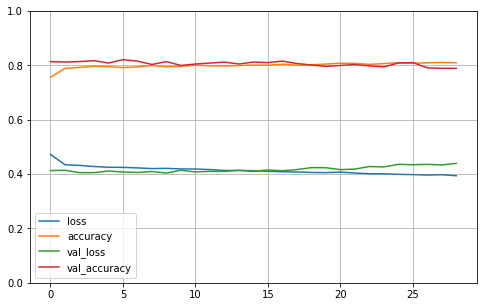

In [198]:
pd.DataFrame(history_func2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

**MODEL EVALUATION: Accuracy**

In [199]:
modelfunc2_score = model_func2.evaluate(X_test,y_test)

45/45 [==============================] - 0s 862us/step - loss: 0.4463 - accuracy: 0.7906


# VIII. MODEL ANALYSIS

In [200]:
print('1) Basic ANN Sequential API #1:', model1_score)
print('2) Improved ANN Sequential API #2:', model2_score)
print('3) Basic ANN Functional API #1:', modelfunc_score)
print('4) Improved ANN Functional API #2:', modelfunc2_score)

1) Basic ANN Sequential API #1: [0.41778314113616943, 0.7955996990203857]
2) Improved ANN Sequential API #2: [0.4075727164745331, 0.8076649904251099]
3) Basic ANN Functional API #1: [0.4701708257198334, 0.8048261404037476]
4) Improved ANN Functional API #2: [0.44627323746681213, 0.7906316518783569]


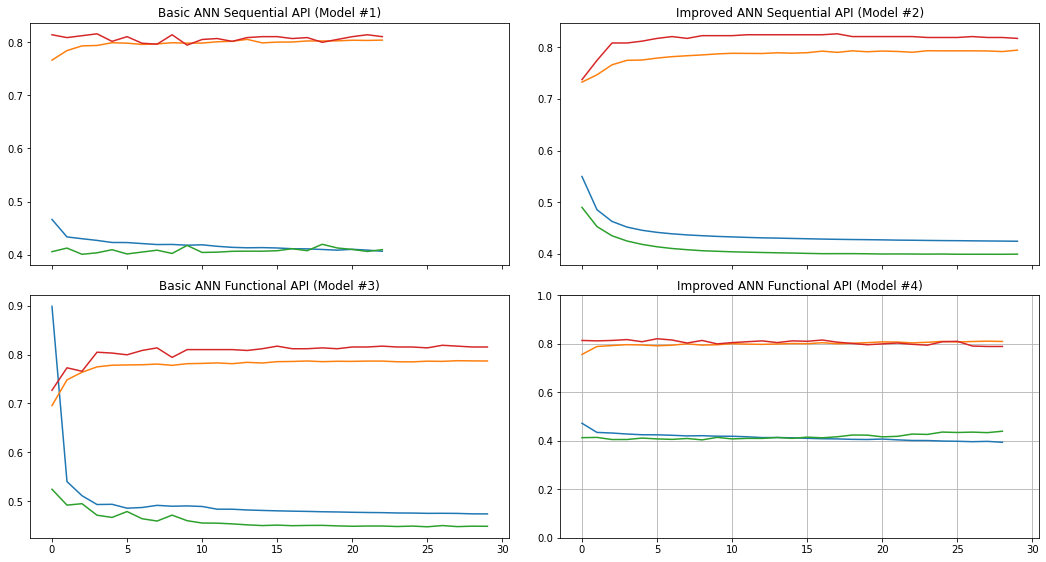

In [201]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2,2, sharex=True, figsize=(15,8))
fig.tight_layout(pad=2)

ax1.plot(pd.DataFrame(history1.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
ax1.set_title('Basic ANN Sequential API (Model #1)')

ax2.plot(pd.DataFrame(history2.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
ax2.set_title('Improved ANN Sequential API (Model #2)')

ax3.plot(pd.DataFrame(history_func.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
ax3.set_title('Basic ANN Functional API (Model #3)')

ax4.plot(pd.DataFrame(history_func2.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
ax4.set_title('Improved ANN Functional API (Model #4)')
plt.show()

**1) Basic ANN Sequential API #1:**

***ANN Sequential API with 3 hidden layers using relu activation, each layer set with 100-50-50 neurons, and trained to 50 epoch WITH early stopping, and using adam as optimizer.***

**-Data test score:** 0.41778314113616943, 0.7955996990203857

-At Epoch 23/50 training stopped, with the lowest loss jumped to 0.40 from 0.46, and highest accuracy jumped to 0.80 from 0.76

**2) Improved ANN Sequential API #2:**

***with 2 hidden layers using relu activation, each layer set with 50 neurons, and trained to 30 epoch WITHOUT early stopping, and using SGD as optimizer.***

**-Data test score:** 0.4075727164745331, 0.8076649904251099

-At final Epoch (30/30), model jumped to lowest loss at 0.42 from 0.55, and reached highest accuracy at 0.79 from 0.73

**3) Basic ANN Functional API #3:**

***with 3 hidden layers, each layer set with 50 neurons, using relu activation. Trained to 30 epochs WITHOUT early stopping, and using SGD as optimizer.***

**-Data test score:** 0.4701708257198334, 0.8048261404037476

-At final Epoch (30/30), model jumped to lowest loss at 0.47 from 0.89, and reached highest accuracy at 0.78 from 0.69

**4) Improved ANN Functional API #4:**

***with 5 hidden layers, each layer set with 50 neurons, using relu activation. Trained to 50 epochs WITH early stopping, and using adam as optimizer.***

**-Data test score:** 0.44627323746681213, 0.7906316518783569

-At Epoch 29/50 training stopped, model jumped to lowest loss at 0.39 from 0.47, and reached highest accuracy at 0.80 from 0.75

# IX. MODEL SAVING

**For predicting, I will use model Improved ANN Sequential API #2, as it has the lowest data test loss and higher data test accuracy score compared to other 3 models.** 

In [202]:
model2.save("keras_model.h5")

# X. MODEL INFERENCE USING BEST MODEL

In [203]:
#load model 
model = keras.models.load_model("keras_model.h5")

#predict
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.46],
       [0.05],
       [0.01],
       [0.71],
       [0.03]], dtype=float32)

***Only the 4th new data is predicted to leave/churn (value > 0.5), while others are predicted to stay (value < 0.5).***

# XI. OVERALL ANALYSIS

-Both classes are dominated with non-senior citizen, although there are more senior customers to churn than there are who do not churn

-Majority of loyal customers are people with partners, while people with no partners are most likely to churn

-Both classes are dominated with customers who do not have dependents, although there are more loyal customers with dependents than churned customers with dependents

-Customers signed up for DSL internet service seems to be less likely to churn

-Features streaming TV & Movie seems to be features that are similar to each other by seeing the graph & distribution of it. There are more churned customers who did not sign up for both products, although it is not very significant

-Customers with longer term contract (one/two year contract) are less likely to churn, and customers whose payment method were electronic check, are more likely to churn than other payment menthod.

-The distribution of Total Charges seems to be same for both classes, while customers with a lower monthly charge seems to stay than ones with higher monthly charge. Tenure of both classes totally has a different distribution, customers with longer tenure tends to stay while those with shorter tenure are more likely to leave/churn.

-From overall EDA, Demographical features: senior citizen, partner, and dependents, Signed-up products features: internet service, online security, streaming movies, and Account information: tenure, contract and monthly charge are considered to be useful features for our classification model deep learning.

**Advice for Telco company:**

-Target younger customers with partner & dependents: such as making "family subscription" that is cheaper than personal

-Serve more variant TV channels/movies to get customers signed up for more than 1 products 

-Target more customers to signed up for one or two year contracts and minimize monthly subscribers

-Customer churn predictor can be accessed at https://nisa-ph2-ms1.herokuapp.com/